<a href="https://colab.research.google.com/github/sofialabrab/ADA-informes/blob/main/ProbMochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE LA MOCHILA**

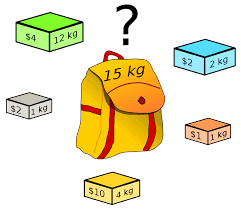

En esta oportunidad analizaremos el problema de la mochila, pero antes de eso debemos conocer una estrategia de resolución previa, la cual será **algoritmo greedy**.

##***Algoritmo Greedy***


> El algoritmo greedy, es conocido por ser voráz al resolver **problemas de optimización**, debido que analiza un subproblema y toda la mejor solución que se da *en el momento*. Es importante recalcar que la solución es **momentanea**, por lo que el algoritmo no evaluará si la solcuión que esta tomando actualmente será la más óptima en un futuro.

**No siempre** nos entregan una solución óptima.






Se nos presenta el siguiente problema:



>"Un ladrón quiere robar una tienda que tiene $obj$ objetos. Cada objeto tiene un peso $p$ y un valor $v$. El ladrón tiene una mochila que soporta un peso máximo $pMax$.  ¿Cuanto es el valor máximo óptimo que se puede llevar el ladrón en la mochila, considerando el peso máximo de la mochila?"



Para resolver este problema, analizaremos dos algoritmos: Bottom-Up y Algoritmo Greedy.



##**PASOS DEL ALGORITMO BOTTOM-UP**

1. Creamos una matriz:



> **Filas:** Su tamaño será de: la cantidad de objetod "obj" + 1


> **Columnas:** Su tamaño será de: peso máximo "pMax" + 1

  Por lo que la matriz seria -> $ m = (obj+1) x (pMax+1)$

  Llenamos esta matriz de 0.

2. Tendremos una subestructura óptima, la cual cuenta con 3 casos, pero antes de nombrarlos es necesario saber que:



    m : matriz
    p : peso actual
    obj : objeto actual
    p[obj] : peso del objeto actual
    v[obj] : valor del objeto actual


Por lo que:



> $m[obj, p]$ =

```
 {

  a. 0, si el obj = 0 || p = 0

  b. m[obj - 1, p], si p[obj] > p

  c. max(m[obj - 1, p], m[obj - p, p - p[obj] + v[obj]), si p[obj] < p

}
```



           Estos casos serán: 
           a -> Cuando la cantidad de objetos es 0 o el peso del objeto es 0, por lo que no se puede agregar.
           b -> El peso del objeto actual superá la capacidad máxima que esta disponible en la mochila, por lo que se toma la solución del objeto anterior.

           c -> Como el peso objeto actual no supera el espacio disponible en la mochila, se elige la solución óptima para este caso, es decir, el máximo entre la solución anterior y la solución del caso anterior más el valor agregado del objeto actual.



3. Contaremos con dos ciclos anidados, uno que recorra las filas y otro para las columnas, ocuparemos la subestructura óptima mencionada en el paso anterior para almacenar el valor correspondiente.





In [114]:
import numpy as np
from math import inf
import random 

def bottomMochila(val, pss, pMax, lrg, cont, verbose):
   
  m = np.zeros((lrg + 1, pMax + 1))
  if(verbose == True):
    print("- PASO 1 - ")
    print("Se crea matriz de Bottom-Up")
    print(m,"\n")
    print("\n- PASO 2 - ")
    print("Se recorre la matriz:")

  for i in range(lrg + 1):
    if(i  >= 1):
      if(verbose == True):
        print("\nEstatus matriz :")
        print(m, "\n")
    for j in range(pMax + 1):
      if i == 0 or j == 0:
        if(verbose == True):
          print("Caso a:")
          print("en la posición", i, ",", j, "se almacena : 0")
        m[i][j] = 0
        cont[0]+=1
      elif pss[i - 1] > j:
        m[i][j] = m[i-1][j]
        if(verbose == True):
          print("Caso b:")
          print("en la posición", i, ",", j, "se almacena : ", m[i][j])
        cont[0]+=1
      else:
        m[i][j] = max(val[i - 1] + m[i - 1][j - pss[ i- 1]], m[ i - 1 ][j])
        if(verbose == True):
          print("Caso c:")
          print("en la posición", i, ",", j, "se almacena : ", m[i][j])
        cont[0]+=1


  if(verbose == True):
    print("\n ULTIMO Estatus matriz :")
    print(m, "\n")


  return m[lrg][pMax], cont



val = [1, 2, 2, 4, 10]
pss = [1, 1, 2, 12, 4]
pMax = 8
cont = [0]
valorMax, cont= bottomMochila(val, pss, pMax, len(val), cont, verbose = False)
print("El valor máximo que puede almacenar la mochila respecto al valor y peso de los obj es:", valorMax)
print("Cantidad de súbproblemas:", cont[0])



El valor máximo que puede almacenar la mochila respecto al valor y peso de los obj es: 15.0
Cantidad de súbproblemas: 54


###**EJEMPLO PASO A PASO**

En el siguiente bloque veremos paso a paso como se va rellenando la matriz, dependiendo del caso que se encuentre en nuestra subestructura óptima:

**Entrada:**

Tendremos 2 arreglos, uno que contiene los valores de los objetos, el otro con los pesos de los objetos y el peso máximo que puede soportar la mochila.

**Tamaño:** El tamaño es la cantidad de objetos a analizar, es decir, la cantidad de objetos almacenados en valores.

val = [1, 2, 2, 4, 10]

pss = [1, 1, 2, 12, 4]

pMax = 7

In [115]:
val = [1, 2, 2, 4, 10]
pss = [1, 1, 2, 12, 4]
pMax = 8
cont = [0]
valorMax, cont= bottomMochila(val, pss, pMax, len(val), cont, verbose = True)
print("El valor máximo que puede almacenar la mochila respecto al valor y peso de los obj es:", valorMax)
print("Cantidad de súbproblemas:", cont[0])

- PASO 1 - 
Se crea matriz de Bottom-Up
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]] 


- PASO 2 - 
Se recorre la matriz:
Caso a:
en la posición 0 , 0 se almacena : 0
Caso a:
en la posición 0 , 1 se almacena : 0
Caso a:
en la posición 0 , 2 se almacena : 0
Caso a:
en la posición 0 , 3 se almacena : 0
Caso a:
en la posición 0 , 4 se almacena : 0
Caso a:
en la posición 0 , 5 se almacena : 0
Caso a:
en la posición 0 , 6 se almacena : 0
Caso a:
en la posición 0 , 7 se almacena : 0
Caso a:
en la posición 0 , 8 se almacena : 0

Estatus matriz :
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]] 

Caso a:
en la posición 1 , 0 se almacena : 0
Caso c:
en la posición 1 , 1 se almacena :  1.0
Caso c:
en la posición 1 , 2 se almacena : 

##**PASOS DEL ALGORITMO GREEDY**

1. Crear un arreglo que contenga los índices de los objetos.

2. En un arreglo almacenar el - *valor de los objetos dividido en el peso* - y ordenar estos de mayor a menor.

3. Recorrer el arreglo de índices, agregando los objetos a la mochila.

Al ir agregando los índices de mayor a menor, sabemos que estamos agregando los objetos de manera óptima.










In [125]:
def greedyMochila(val, pss, pMax, lrg, cont, verbose):
  
  ratio = np.zeros(lrg)
  index = np.zeros(lrg)
  maxValor = 0

  for i in range(lrg):
    ratio[i] = val[i] / pss[i]
    
    

  for i in range(lrg):
     max = 0
     
     for j in range(i, lrg):
      cont[0] += 1
      if(ratio[i] > maxValor):
        max += ratio[i]
         # orden
        ratio[j], ratio[i] = ratio[i], ratio[j]
        index[j], index[i] = index[i], index[j]
        

  for i in range(lrg):
    
    if (pss[i] <= pMax):
      cont[0] += 1
      maxValor += val[i]
      pMax -= pss[i]



  return maxValor, cont


val = [1, 2, 2, 4, 10]
pss = [1, 1, 2, 12, 4]
pMax = 8
cont = [0]
valorMax, cont= greedyMochila(val, pss, pMax, len(val), cont, verbose = False)
print("El valor máximo que puede almacenar la mochila respecto al valor y peso de los obj es:", valorMax)
print("Cantidad de iteraciones:", cont[0])



El valor máximo que puede almacenar la mochila respecto al valor y peso de los obj es: 15
Cantidad de súbproblemas: 19


## **Tiempo de Ejecución**

**Algoritmo Bottom-Up**:

Contenemos dos ciclos anidados:

  *Filas:* $O(i)$
  
  *Variable de peso:* $O(p)$

Obtener la solución óptima: $O(1)$ 

Se debe iterar i x p cantidad de veces, donde i = n.

**Por lo que el tiempo de ejecución de este algoritmo es de**: $O(n * p)$


**Algoritmo Greedy**:

En este algoritmo tenermos que realizar:

Ordenar los valores : $O(n * log(n))$

Obtener la solución óptima : $O(n)$

**Por lo que el tiempo de ejecución de este algoritmo es de**: $O(n * log(n))$


## **Correctitud**

Necesitamos saber si ambos algoritmos analizados dieron una respuesta óptima para el problema que se nos presento y para que si sea calificado como **óptimo**, tendremos en consideración que:
1. Se calculó el valor máximo
2. Se utilizó todo el espacio de la mochila
**Algoritmo Bottom-Up**:

Demostraremos la correctitud con la sub estructura óptima que consiste en 3 condiciones para la matriz, que fueron nombradas anteriormente.


*  **Caso a:**  $i = 0$ y $p = 0$ : $0$
*  **Caso b:**  $p[i]>p$  = $m[i-1,p]$
*   **Caso c:** $p[i] < = p$ =  $max(m[ i - 1 , p], m[i - p, p - p[i] + v[i]])$



Desarrollando la correctitud por inducción

**Caso base**:

$ m[i, 0] = m[0, j] = 1$  , para todo i - j

Este caso base corresponde para cuando el valor máximo es el mismo.

**Paso inductivo**:

Para cada m el valor óptimo se encuentra gracias a la sub estructura óptima donde los subproblemas siempre estarán correctos.

**Algoritmo Greedy**:


Si analizamos ambos algoritmos con los mismos valores de entrada nos daremos cuenta de que no son iguales, esto ocurre debido a la manera que funciona que se explicó antes, además sabemos que es un algoritmo voraz, es uno que realiza, en cada momento, la acción que parece ser la mejor.




##**Experimentos**
En los siguientes experimentos, se ocupará un generador de instancias para los arreglos de valores y pesos. También nos entregará el peso máximo que aguanta la mochila.

Para analizar los algoritmos estudiados, en todos los experimentos, ambos contarán con las mismas variables, tanto como tamaño, arreglo de valores, arreglo de pesos y peso máximo.

### **GRÁFICO CANTIDAD DE SUBPROBLEMAS**

Se analizará la cantidad de subproblemas que resuelve cada algoritmo para un mismo problema.

El tamaño de los arreglos, varía en el rango de 5 a 9.

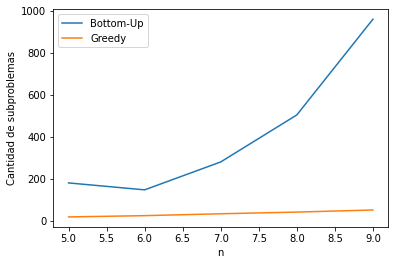

In [138]:
def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt


x=[n for n in range(5,10)] 
y=[]; 
z=[];

for n in range(5,10):
  pMax, val, pss = knapsack_instance_generator(n)
  verbose = False
  cont = [0]
  bottomMochila(val, pss, pMax, len(val),cont,verbose)
  cont2 = [0]
  greedyMochila(val, pss, pMax, len(val),cont2,verbose)

  y.append(cont)
  z.append(cont2)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Bottom-Up", "Greedy"])

plt.xlabel('n')
plt.ylabel('Cantidad de iteraciones')
plt.show()


**Resultado:** Como podemos ver el algoritmo de programación dínamica resuelve más subproblemas, debido que por cada fila analiza todas las columnas para poder tener el caso apropiado (a, b o c) y almacenar el valor en la matriz. En cambio el algoritmo Greedy solo itera hasta llegar al peso máximo.

### **GRÁFICO TIEMPO DE EJECUCIÓN**

Analizaremos que algoritmo es más eficiente a la hora de entregar una solución en el menor tiempo esperado según su tamaño.

El tamaño de los arreglos, varía en el rango de 5 a 9.

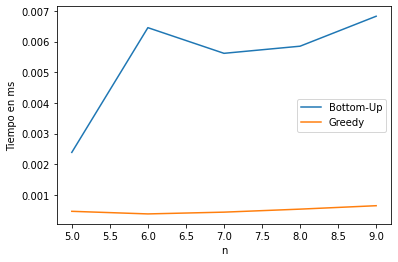

In [139]:
import random
import numpy as np
from timeit import repeat
import matplotlib.pyplot as plt

x=[]; y1=[]; y2=[];

for n in range(5,10):
  pMax, val, pss = knapsack_instance_generator(n)
  lrg = len(val)
  verbose = False
  cont = [0]
  cont2 = [0]
  
  t1 = repeat(setup="from __main__ import bottomMochila", stmt=f"bottomMochila({val},{pss},{pMax},{lrg},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import greedyMochila", stmt=f"greedyMochila({val},{pss},{pMax},{lrg},{cont2},{verbose})", repeat=1, number=10)
  

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Bottom-Up", "Greedy"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**Resultado:** El algoritmo Greedy en tiempo de ejecución es más eficiente que Bottom-Up, debido que al realizar menos iteraciones llega a la solución de manera más rápida que Bottom-Up.Sin embargo, a pesar que obtiene una solución más rápido no siempre es la solución **más óptima**.

##**Gráfico valor óptimo**

En este experimento, se analizará que algoritmo entrega el mejor valor óptimo que puede almacenar la mochila dependiendo de la cantidad de objetos.

La cantidad de  objetos varía entre 5 y 50, con saltos de 10.

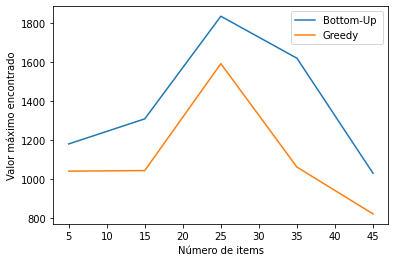

In [140]:
x=[]; y=[]
y1=[]

for n in range(5,50,10):

  pMax, val, pss = knapsack_instance_generator(10)
  lrg = len(val)
  cont = [0]
  cont1 = [0]
  valMax1, cont = bottomMochila(val, pss, pMax, lrg, cont ,  verbose = False)
  valMax2, cont1 = greedyMochila(val, pss, pMax, lrg, cont, verbose = False)
  x.append(n)
  y.append(valMax1)
  y1.append(valMax2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Bottom-Up ", "Greedy"])

plt.xlabel('Número de items')
plt.ylabel('Valor máximo encontrado')
plt.show()

**Resultado:** En el gráfico anterior, llegamos a la conclusión que el algoritmo Greedy es más eficiente a la hora de llegar a una solución. En este gráfico podemos ver y comprobar la correctitud, que el algoritmo **Bottom-up** llega a una solución óptima, al contrario del algoritmo Greedy, este no llega al valor más óptimo para la resolución de cada problema.